<a href="https://colab.research.google.com/github/Vishy-A/MachineLearningIntro/blob/main/FinalProject/Classical_Model_jpyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import and read file
file_path = '/content/drive/My Drive/airplane_sat.csv'
airplane = pd.DataFrame(pd.read_csv(file_path))

# Checking Null values
airplane.isnull().sum()*100/airplane.shape[0]

ID                                        0.0
Gender                                    0.0
Age                                       0.0
Customer Type                             0.0
Type of Travel                            0.0
Class                                     0.0
Flight Distance                           0.0
Departure Delay                           0.0
Arrival Delay                             0.0
Departure and Arrival Time Convenience    0.0
Ease of Online Booking                    0.0
Check-in Service                          0.0
Online Boarding                           0.0
Gate Location                             0.0
On-board Service                          0.0
Seat Comfort                              0.0
Leg Room Service                          0.0
Cleanliness                               0.0
Food and Drink                            0.0
In-flight Service                         0.0
In-flight Wifi Service                    0.0
In-flight Entertainment           

In [ ]:
airplane.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,3,Male,41,Returning,Business,Business,853,0,0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
1,4,Male,50,Returning,Business,Business,1905,0,0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
2,6,Male,43,Returning,Business,Business,3788,0,0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
3,7,Male,43,Returning,Business,Business,1963,0,0,3,...,5,5,5,4,5,5,3,5,5,Satisfied
4,9,Male,50,Returning,Business,Business,2607,0,0,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied


In [ ]:
# Remove unnecessary data
airplane.pop('ID')

# Apply binary map to inputs with a string
varstrings = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']


def binarymap(inp):
  return inp.map({'Male' : 1, 'Female' : 0, 'First-time' : 0, 'Returning' : 1, 'Business' : 0,
                  'Personal' : 1, 'Economy' : 1, 'Economy Plus' : 2, 'Neutral or Dissatisfied' : 0, 'Satisfied' : 1})
### GENDER:
# Male -> 1
# Female -> 2

### COSTUMER TYPE:
# First Time -> 0
# Returning -> 1

### TYPE OF TRAVEL:
# Business -> 0
# Peresonal -> 1

### Class:
# Business -> 0
# Economy -> 1
# Economy -> 2

### Satisfaction
# Nuetral/Dissatisfied -> 0
# Satisfied -> 1

airplane[varstrings] = airplane[varstrings].apply(binarymap)

airplane.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,41,1,0,0,853,0,0,4,4,...,3,5,3,5,5,3,4,3,3,1
1,1,50,1,0,0,1905,0,0,2,2,...,5,5,5,4,4,5,2,5,5,1
2,1,43,1,0,0,3788,0,0,4,4,...,4,4,4,3,3,4,4,4,4,1
3,1,43,1,0,0,1963,0,0,3,3,...,5,5,5,4,5,5,3,5,5,1
4,1,50,1,0,0,2607,0,0,1,1,...,4,3,4,3,3,4,4,4,4,0


In [ ]:
# Output
y = airplane.pop("Satisfaction")
# Input
x = airplane.values

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

#### Perform LOGISTIC REGRESSION
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
classifier = LogisticRegression(random_state=0, penalty='l2', C=1, solver='sag')
classifier.fit(x_train, y_train)

pred = classifier.predict(x_test)

In [ ]:
cnf_matrix = confusion_matrix(y_test, pred)
cnf_matrix

array([[13515,  1224],
       [ 2037,  9122]])

In [ ]:
# Display Accuracy
accuracy = metrics.accuracy_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
F1 = (2*precision*recall)/(precision+recall)
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 Score = ', F1)

Accuracy =  0.8740829407676268
Precision =  0.8816934080804175
Recall =  0.8174567613585447
F1 Score =  0.8483608463148105


Text(0.5, 427.9555555555555, 'Predicted Label')

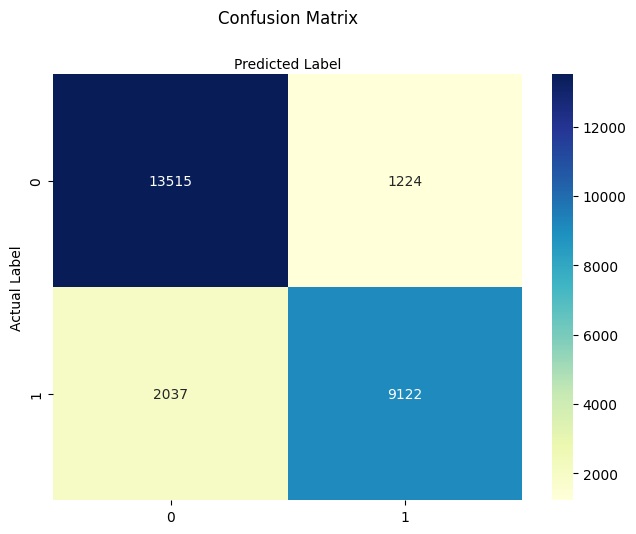

In [ ]:
# Print Confusion Matrix
class_names = ['Satisfied','Neutral/Not Satisfied']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')